<a href="https://colab.research.google.com/github/vnvz/Boston-house-prices-analysis/blob/main/colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Organização das colunas e dados

Como os dados estão desorganizados em uma coluna com varios valores separados por um espaço, iremos importar os dados e organizá-los em colunas.

In [ ]:
housing = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dados/housing.csv', header=None, sep='\s+')

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing.columns = column_names

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Para pegarmos a matriz de correlação, separamos uma amostra de 30% do Dataset e realizamo a função para gerar. Após isso, usamos um heatmap para visualização.

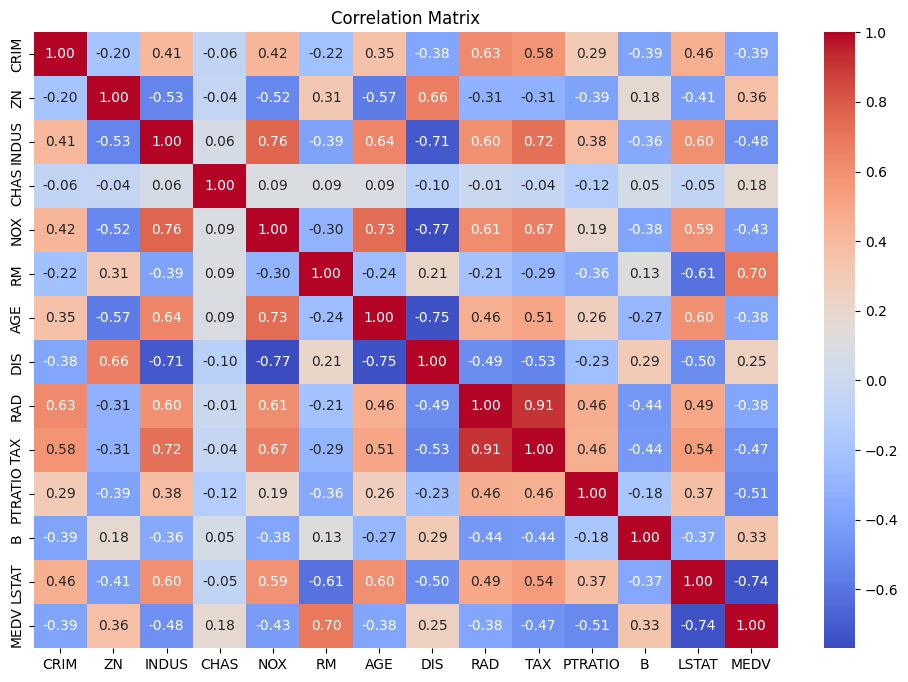

In [ ]:
sample = housing

corr_matrix = sample.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Através dessa matriz, podemos identificar as variáveis mais correlacionadas. Elas sendo:

- NOX e INDUS
- NOX e TAX
- INDUS e TAX
- AGE e NOX
- RAD e NOX
- TAX e RAD
- AGE e LSTAT

Para definir se essas variáveis são dependentes, vamos separar 4 variáveis e calcular o coeficiente de correlação de Pearson para confirmar isso.

Calcularemos esse coeficiente nas variáveis:
- NOX e INDUS
- TAX e RAD

In [ ]:
NOX = housing['NOX']
INDUS = housing['INDUS']
TAX = housing['TAX']
RAD = housing['RAD']

In [ ]:
NOXeINDUS = NOX.corr(INDUS)
TAXeRAD = TAX.corr(RAD)

print("PCC:", NOXeINDUS)
print("PCC:", TAXeRAD)

PCC: 0.763651446920914
PCC: 0.9102281885331835


Com isso, podemos ver que TAX e RAD possuem uma alta correlação, portanto iremos seguir com essas duas variáveis.

## Hipótese

Vendo a correlação e as descrições das variáveis, podemos formular uma hipótese que diz que a correlação dessas duas variáveis faz sentido pois casas em localizações de mais fácil acesso, sendo próximas de avenidas e vias principais, torna ela uma casa com um custo de vida maior.

Com isso realizamos a regressão linear dessas duas variáveis e plotamos em um gráfico.

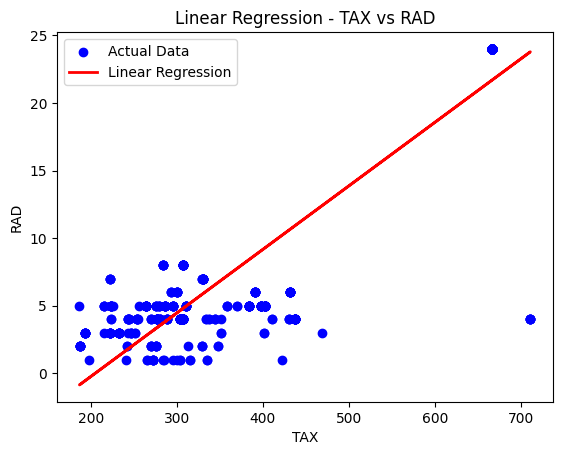

In [ ]:
X = housing['TAX'].values.reshape(-1, 1)
y = housing['RAD'].values

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('Linear Regression - TAX vs RAD')
plt.legend()
plt.show()

Após isso, rodaremos uma regressão não paramétrica.

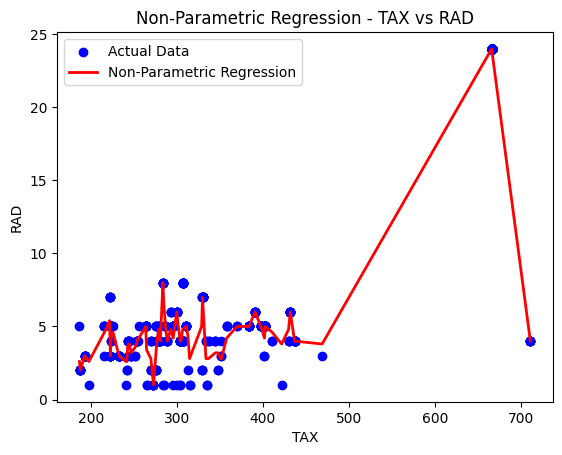

In [ ]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X, y)

y_pred = regressor.predict(X)

sort_indexes = np.argsort(X.flatten())
X_sorted = X[sort_indexes]
y_pred_sorted = y_pred[sort_indexes]

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Non-Parametric Regression')
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('Non-Parametric Regression - TAX vs RAD')
plt.legend()
plt.show()

Com isso, podemos confirmar que a hipótese original se concretiza.